<h3>Setup + sample data (with injected outliers)</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

n = 100
height = np.random.normal(170, 10, n)
weight = np.random.normal(70, 12, n)
income = np.random.lognormal(mean=10, sigma=0.4, size=n)

# Inject outliers
height = np.append(height, [250, 30])
weight = np.append(weight, [200, 5])
income = np.append(income, [1e7, 1])

df = pd.DataFrame({
    "height_cm": height,
    "weight_kg": weight,
    "income": income
})

print(df.shape)
df.head()



(102, 3)


,height_cm,weight_kg,income
0,174.967142,53.015551,25415.511209
1,168.617357,64.952256,27565.321948
2,176.476885,65.887426,33969.573208
3,185.230299,60.372673,33574.456070
4,167.658466,68.064571,12694.603398


<h3>Visualize Raw Data (Separate Boxplots)</h3>

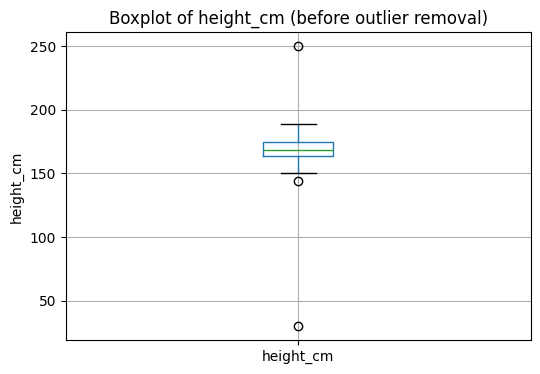

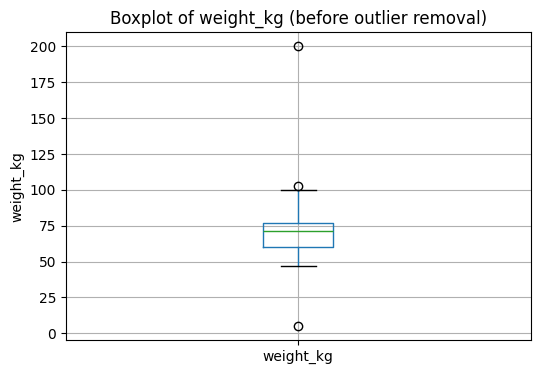

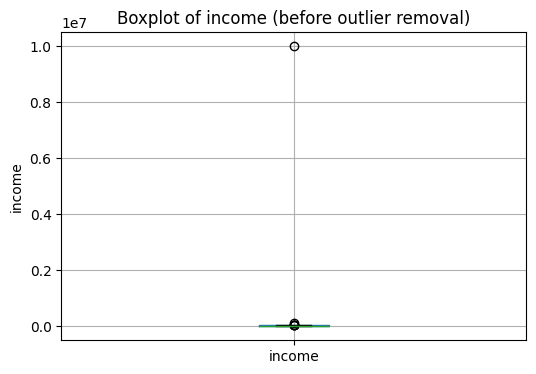

In [2]:
for col in ["height_cm", "weight_kg", "income"]:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col} (before outlier removal)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()



<h3>Z‑Score method</h3>
Rule: Drop rows where any numeric column has |z| > 3 (you can tune the threshold).

In [3]:
numeric_cols = df.select_dtypes(include="number").columns
z = np.abs(stats.zscore(df[numeric_cols], nan_policy="omit"))

threshold = 3
df_zscore_clean = df[(z < threshold).all(axis=1)]

print("Original shape:", df.shape)
print("After Z-score filtering:", df_zscore_clean.shape)


Original shape: (102, 3)
After Z-score filtering: (100, 3)


<h3>(Optional) Visualize Z‑Score Cleaned Data -- after filtering</h3>

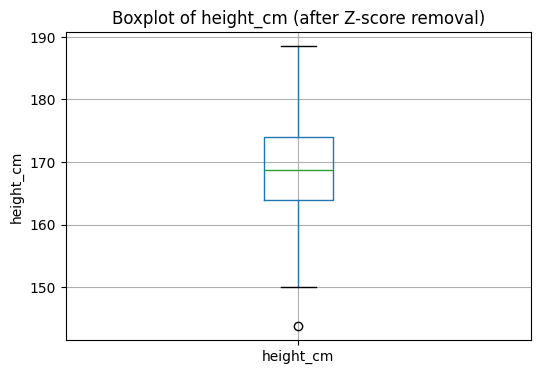

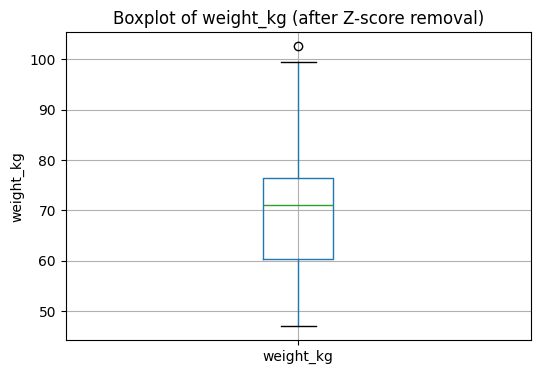

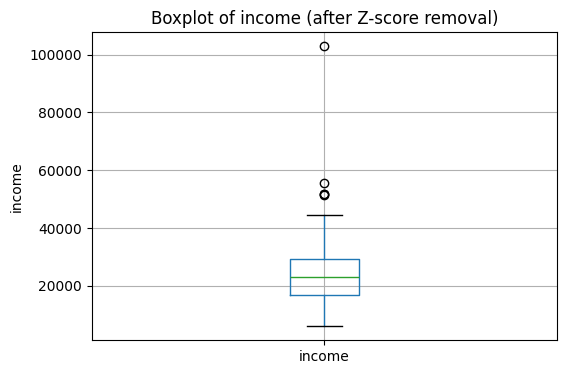

In [4]:
for col in ["height_cm", "weight_kg", "income"]:
    plt.figure(figsize=(6, 4))
    df_zscore_clean.boxplot(column=[col])
    plt.title(f"Boxplot of {col} (after Z-score removal)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


<h3>IQR method</h3>
Rule: Compute</br>
Q1 = 25th percentile, Q3 = 75th percentile, IQR = Q3 - Q1</br>
Keep only points inside [Q1 − 1.5×IQR, Q3 + 1.5×IQR] for every numeric column.

In [5]:
#Option 1: Create a cleaned version per column
df_iqr_clean_height = df[
    (df["height_cm"] >= df["height_cm"].quantile(0.25) - 1.5 * (df["height_cm"].quantile(0.75) - df["height_cm"].quantile(0.25))) &
    (df["height_cm"] <= df["height_cm"].quantile(0.75) + 1.5 * (df["height_cm"].quantile(0.75) - df["height_cm"].quantile(0.25)))
    ]

df_iqr_clean_weight = df[
    (df["weight_kg"] >= df["weight_kg"].quantile(0.25) - 1.5 * (df["weight_kg"].quantile(0.75) - df["weight_kg"].quantile(0.25))) &
    (df["weight_kg"] <= df["weight_kg"].quantile(0.75) + 1.5 * (df["weight_kg"].quantile(0.75) - df["weight_kg"].quantile(0.25)))
    ]

df_iqr_clean_income = df[
    (df["income"] >= df["income"].quantile(0.25) - 1.5 * (df["income"].quantile(0.75) - df["income"].quantile(0.25))) &
    (df["income"] <= df["income"].quantile(0.75) + 1.5 * (df["income"].quantile(0.75) - df["income"].quantile(0.25)))
    ]




<h3>(Optional) Visualize IQR Cleaned Data -- after filtering</h3>

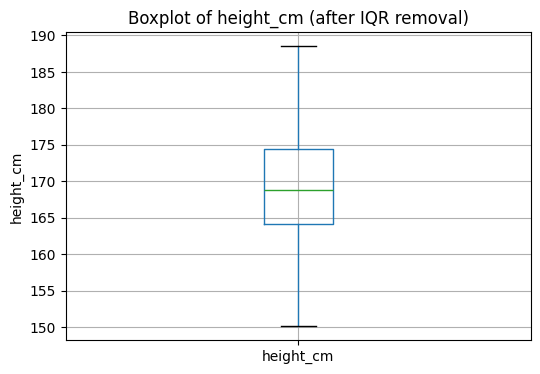

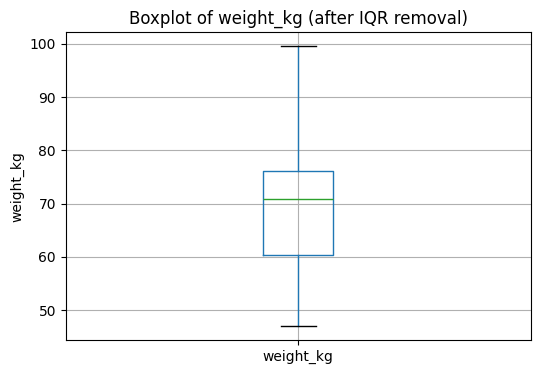

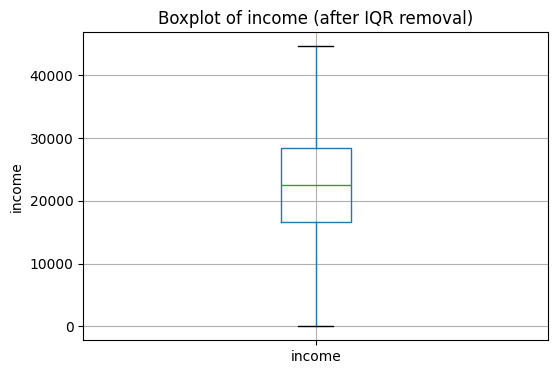

In [6]:
# Mapping each column to its corresponding cleaned DataFrame
cleaned_dfs = {
    "height_cm": df_iqr_clean_height,
    "weight_kg": df_iqr_clean_weight,
    "income": df_iqr_clean_income
}

# Plot each boxplot separately using its respective cleaned DataFrame
for col in ["height_cm", "weight_kg", "income"]:
    plt.figure(figsize=(6, 4))
    cleaned_dfs[col].boxplot(column=[col])
    plt.title(f"Boxplot of {col} (after IQR removal)")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()



<h3>Quick comparison</h3>

In [7]:
print(f"Original: {len(df)} rows")
print(f"Z-score kept: {len(df_zscore_clean)} rows")
print(f"IQR kept per column:")
print(f"  height_cm : {len(df_iqr_clean_height)} rows")
print(f"  weight_kg : {len(df_iqr_clean_weight)} rows")
print(f"  income    : {len(df_iqr_clean_income)} rows")



Original: 102 rows
Z-score kept: 100 rows
IQR kept per column:
  height_cm : 99 rows
  weight_kg : 99 rows
  income    : 96 rows


<h3>When to use which?</h3>
<li>Z‑Score: Works well if your data is roughly normal (Gaussian). Sensitive to mean/standard deviation.</li>
<li>IQR: Robust to skewed distributions and extreme values. Often preferred for non‑Gaussian data.</li>